In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial=pd.read_csv(clinical_trial_data_to_load)

mouse_drug.head(15)
clinical_trial.head(15)

# Combine the data into a single dataset
mouse_trial=pd.merge(mouse_drug,clinical_trial,on="Mouse ID")


# Display the data table for preview
mouse_trial.head()




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
all_by_drug_group = mouse_trial.groupby(["Drug","Timepoint"], as_index=False)
all_by_drug=all_by_drug_group.mean()
all_by_drug.head()

volume_by_drug=all_by_drug[["Drug","Timepoint","Tumor Volume (mm3)"]]
volume_by_drug.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#list_of_volume=[volume_by_drug.loc]

# index as false generates an error
tumor_vol_sse=mouse_trial.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]].sem()

tumor_vol_sse2=tumor_vol_sse.reset_index()

tumor_vol_sse2.head()


# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

#drug_index=volume_by_drug.set_index("Timepoint",inplace=False)
#drug_index.head(20)


In [5]:
drug_index_t=volume_by_drug.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
drug_index_t

tumor_vol_sse3=tumor_vol_sse2.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
tumor_vol_sse3
# Preview that Reformatting worked



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


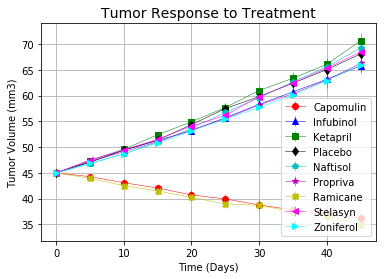

In [24]:
# Generate the Plot (with Error Bars)
fig1, ax1=plt.subplots()

ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Tumor Volume (mm3)")

x_axis=[0,5,10,15,20,25,30,35,40,45]
capomulin=drug_index_t["Capomulin"]
Infubinol=drug_index_t["Infubinol"]
Ketapril=drug_index_t["Ketapril"]
Placebo =drug_index_t["Placebo"] 
Naftisol=drug_index_t["Naftisol"] 
Propriva=drug_index_t["Propriva"] 
Ramicane=drug_index_t["Ramicane"] 
Stelasyn=drug_index_t["Stelasyn"] 
Zoniferol=drug_index_t["Zoniferol"] 

capomulin_sse=tumor_vol_sse3["Capomulin"]
Infubinol_sse=tumor_vol_sse3["Infubinol"]
Ketapril_sse=tumor_vol_sse3["Ketapril"]
Placebo_sse=tumor_vol_sse3["Placebo"]
Naftisol_sse=tumor_vol_sse3["Naftisol"]
Propriva_sse=tumor_vol_sse3["Propriva"]
Ramicane_sse=tumor_vol_sse3["Ramicane"]
Stelasyn_sse=tumor_vol_sse3["Stelasyn"]
Zoniferol_sse=tumor_vol_sse3["Zoniferol"]

#drug_one = plt.plot(x_axis,capomulin, color="r",label="Capomulin",marker=".",linewidth=.5)
#drug_two = plt.plot(x_axis,Infubinol, color="b",label="Infubinol",marker="^",linewidth=.5)
#drug_three = plt.plot(x_axis,Ketapril,color="g",label="Ketapril",marker="s",linewidth=.5)
#drug_four=plt.plot(x_axis,Placebo,color="black",label="Placebo",marker="d",linewidth=.5)

ax1.errorbar(x_axis, capomulin, capomulin_sse,color="r",marker="o",linewidth=.5)
ax1.errorbar(x_axis, Infubinol, Infubinol_sse,color="b",marker="^",linewidth=.5)
ax1.errorbar(x_axis, Ketapril, Ketapril_sse,color="g",marker="s",linewidth=.5)
ax1.errorbar(x_axis, Placebo, Placebo_sse,color="k",marker="d",linewidth=.5)
ax1.errorbar(x_axis, Naftisol, Naftisol_sse,color="c",marker="p",linewidth=.5)
ax1.errorbar(x_axis, Propriva, Propriva_sse,color="m",marker="*",linewidth=.5)
ax1.errorbar(x_axis, Ramicane, Ramicane_sse,color="y",marker="X",linewidth=.5)
ax1.errorbar(x_axis, Stelasyn, Stelasyn_sse,color="fuchsia",marker="<",linewidth=.5)
ax1.errorbar(x_axis, Zoniferol, Zoniferol_sse,color="cyan",marker=">",linewidth=.5)

plt.legend(loc="best")
plt.grid()
plt.title("Tumor Response to Treatment",fontsize=14)

plt.show



# Save the Figure

plt.savefig("Tumor Response to Treatment")

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
sites_by_drug=all_by_drug[["Drug","Timepoint","Metastatic Sites"]]

# Convert to DataFrame

# Preview DataFrame
sites_by_drug.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
tumor_sites_sse=mouse_trial.groupby(["Drug","Timepoint"])[["Metastatic Sites"]].sem()
tumor_sites_sse=tumor_sites_sse.reset_index()
tumor_sites_sse.head()

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [15]:
# Minor Data Munging to Re-Format the Data Frames
drug_index_sites=sites_by_drug.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
drug_index_sites

drug_sites_sse=tumor_sites_sse.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
drug_sites_sse

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


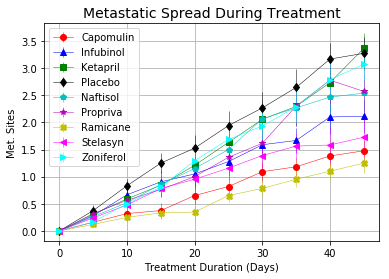

In [23]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()

ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Met. Sites")

capomulin_sites=drug_index_sites["Capomulin"]
Infubinol_sites=drug_index_sites["Infubinol"]
Ketapril_sites=drug_index_sites["Ketapril"]
Placebo_sites =drug_index_sites["Placebo"] 
Naftisol_sites=drug_index_sites["Naftisol"] 
Propriva_sites=drug_index_sites["Propriva"] 
Ramicane_sites=drug_index_sites["Ramicane"] 
Stelasyn_sites=drug_index_sites["Stelasyn"] 
Zoniferol_sites=drug_index_sites["Zoniferol"] 

capomulin_sites_sse=drug_sites_sse["Capomulin"]
Infubinol_sites_sse=drug_sites_sse["Infubinol"]
Ketapril_sites_sse=drug_sites_sse["Ketapril"]
Placebo_sites_sse=drug_sites_sse["Placebo"]
Naftisol_sites_sse=drug_sites_sse["Naftisol"]
Propriva_sites_sse=drug_sites_sse["Propriva"]
Ramicane_sites_sse=drug_sites_sse["Ramicane"]
Stelasyn_sites_sse=drug_sites_sse["Stelasyn"]
Zoniferol_sites_sse=drug_sites_sse["Zoniferol"]


ax2.errorbar(x_axis, capomulin_sites, capomulin_sites_sse,color="r",marker="o",linewidth=.5)
ax2.errorbar(x_axis, Infubinol_sites, Infubinol_sites_sse,color="b",marker="^",linewidth=.5)
ax2.errorbar(x_axis, Ketapril_sites, Ketapril_sites_sse,color="g",marker="s",linewidth=.5)
ax2.errorbar(x_axis, Placebo_sites, Placebo_sites_sse,color="black",marker="d",linewidth=.5)
ax2.errorbar(x_axis, Naftisol_sites, Naftisol_sites_sse,color="c",marker="p",linewidth=.5)
ax2.errorbar(x_axis, Propriva_sites, Propriva_sites_sse,color="m",marker="*",linewidth=.5)
ax2.errorbar(x_axis, Ramicane_sites, Ramicane_sites_sse,color="y",marker="X",linewidth=.5)
ax2.errorbar(x_axis, Stelasyn_sites, Stelasyn_sites_sse,color="fuchsia",marker="<",linewidth=.5)
ax2.errorbar(x_axis, Zoniferol_sites, Zoniferol_sites_sse,color="cyan",marker=">",linewidth=.5)

plt.legend(loc="best")
plt.grid()
plt.title("Metastatic Spread During Treatment",fontsize=14)

plt.show



# Save the Figure

plt.savefig("Metastatic Spread During Treatment")

## Survival Rates

In [44]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count_group = mouse_trial.groupby(["Drug","Timepoint"]).nunique()
mouse_count_group2 =mouse_count_group[["Mouse ID",]]
mouse_count_group3=mouse_count_group2.reset_index()
mouse_count_group3.head()

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [45]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count_group3.pivot(index="Timepoint",columns="Drug",values="Mouse ID")
mouse_count

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

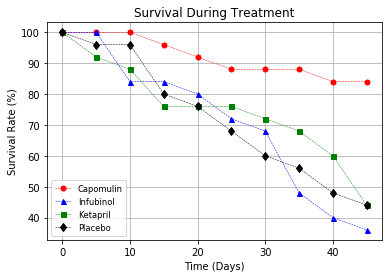

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

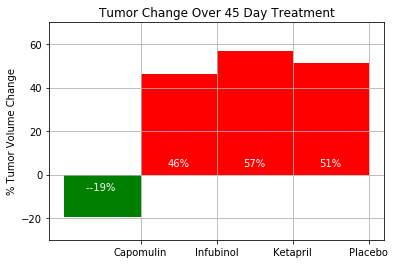